In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt

from rhlUtils import BBox, CCD, Image, imshow

%config InlineBackend.figure_format = 'retina'

#%matplotlib qt
#%gui qt

dataDir = './ImageNoise_RHL/'

I've provided you with two datasets ("bias.npz" and "bias2.npz") which are the trimmed image of a CCD from the PFS project.  One has had a bias frame subtracted, one has not.

You can read the data into an Image, and the Image object is also able to return a view of the data from a single
amplifier (in the range 0..7).  For example, you can say:

<IPython.core.display.Javascript object>


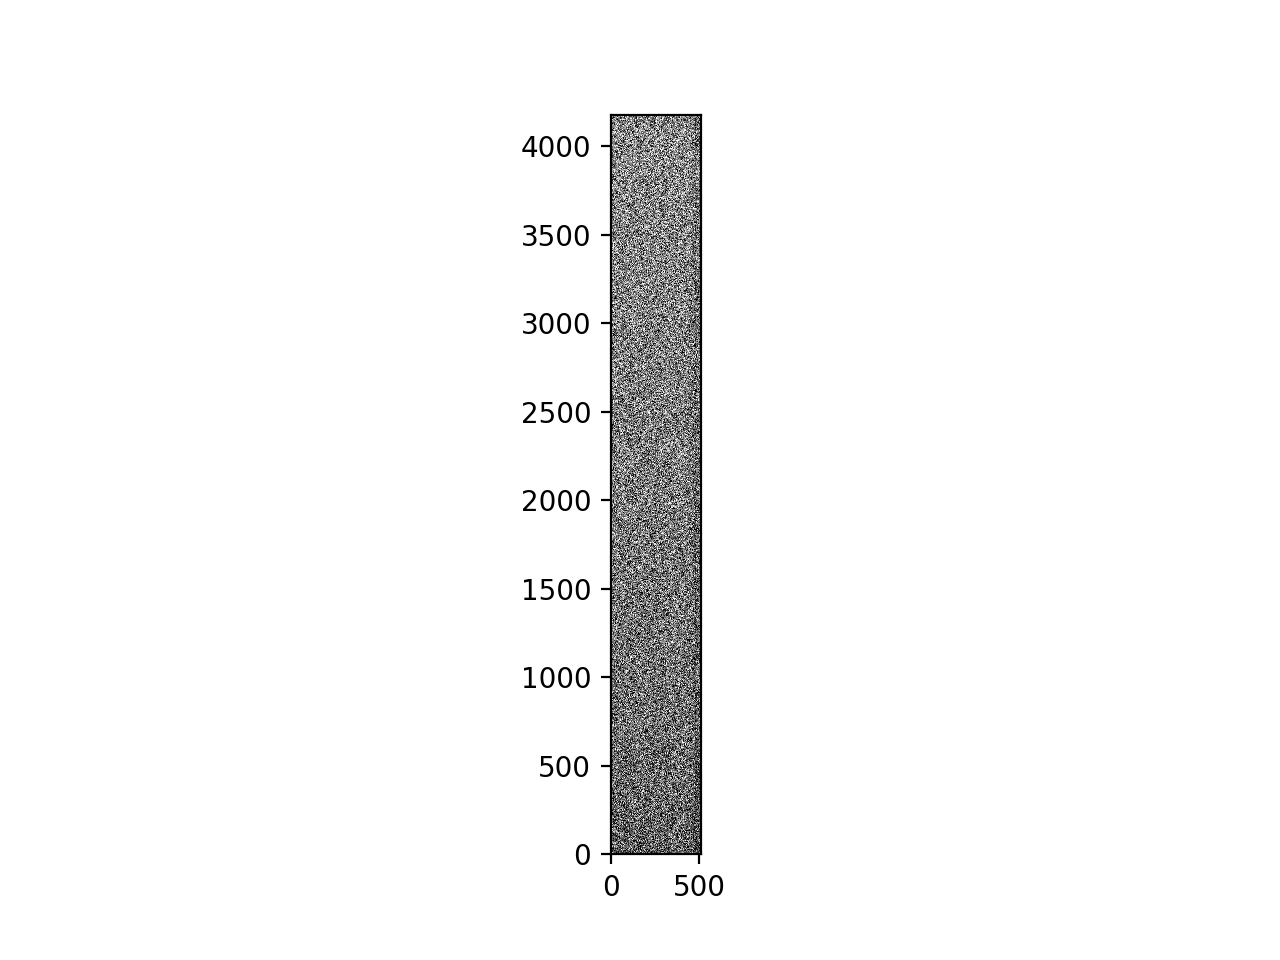

In [23]:
bias = Image(os.path.join(dataDir, "bias.npz"))

aim = bias.getAmpImage(3)

plt.clf()
imshow(aim)     # or you can use plt.imshow if you'd prefer;  imshow is imported from rhlUtils
plt.show();

Take a look at the entire image.  Hint:  each amplifier has its own gain

Which do you think had a bias frame subtracted?  Why?

<IPython.core.display.Javascript object>


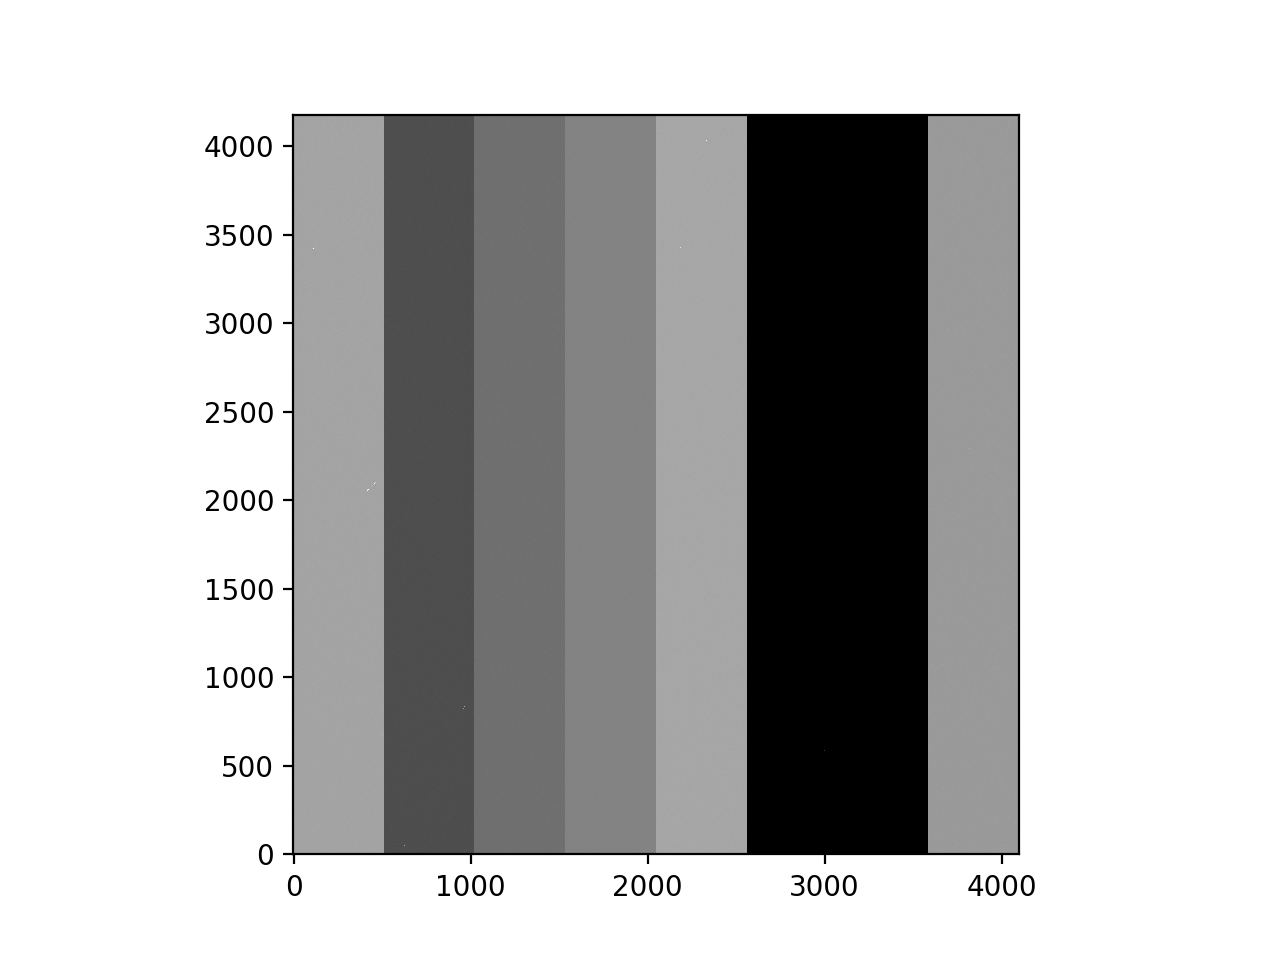

In [24]:
bias = Image(os.path.join(dataDir, "bias.npz"))

plt.clf()
imshow(bias.image)
plt.show();

Write a program to measure the power spectrum of each amplifier separately (but plot them all together).

Each row of the data corresponds to a row of the CCD clocked onto the serial register -- but remember that we have trimmed the data to throw away the extended register and overclock.  The CCD object has the magic numbers you need to correct for this:
-    rawWidth = 552                      # number of pixels digitised per parallel transfer
-    tau_s = 13.92e-6                    # Time for one serial transfer (s)
-    tau_p = 222.72e-6                   # Time for one parallel transfer (s)

There is also some junk in the data (e.g. cosmic rays, transients at the bottom of the chip) that might affect your results -- a simple n-sigma clip might help.

If you've never calculated a power spectrum before you might need some help.  There is code in scipy.signal to do it, but it's a little tricky.  The power spectrum should be essentially flat (but not exactly flat).

Which amplifier has the worst low-frequency behaviour?  Was that what you expected?

<IPython.core.display.Javascript object>


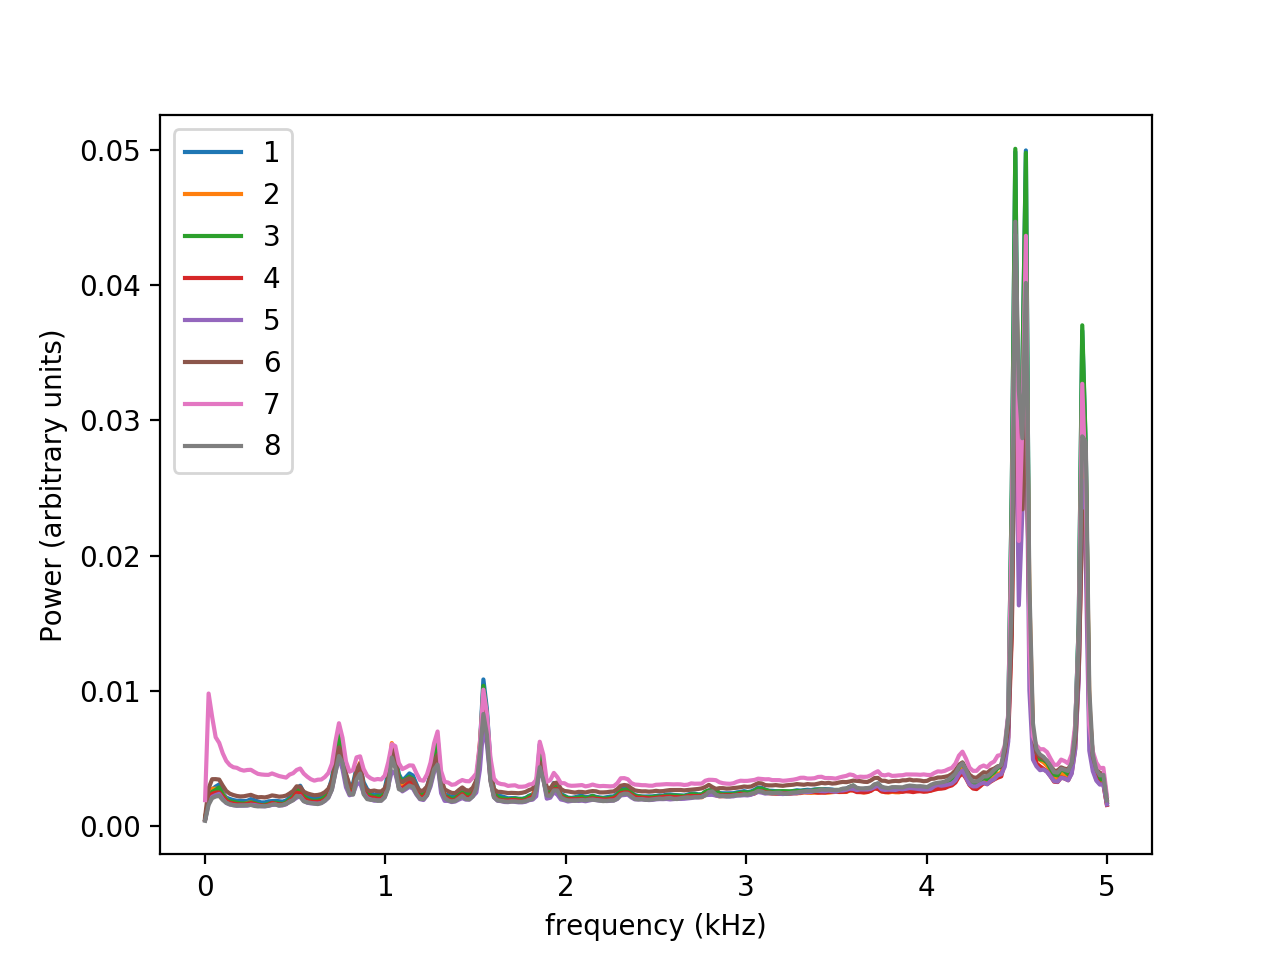

In [33]:
import scipy.signal

bias = Image(os.path.join(dataDir, "bias.npz"))

plt.figure(1)
plt.clf()
ampNo = 0
for amp in bias.amps:
    dat = bias.getAmpImage(amp)
    dat = np.clip(dat, np.mean(dat)-2*np.std(dat), np.mean(dat)+2*np.std(dat))
    fs = 1e4
    f, PS = scipy.signal.welch(dat.flatten(), fs, nperseg = 512)
    ampNo += 1
    plt.plot(1e-3*f, PS, label = str(ampNo))

plt.xlabel("frequency (kHz)")
plt.ylabel("Power (arbitrary units)")
plt.legend()